In [252]:
import pandas as pd
input_df = pd.read_csv("hw2_question3.csv")
input_df.head()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [253]:
num_rows = input_df.shape[0]
print("Number of training samples: ",num_rows)

Number of training samples:  11055


In [254]:
#Question 2(a)
#Pre-processing step, converting features which take 
#values {-1,0,1} into three features each.

#the list of features which take 3 values
features_multival_list = [2, 7, 8, 14, 15, 16, 26, 29] 
temp_list = [-1, 0, 1]

for x in features_multival_list:
    old_column_name = 'f' + str(x)
    for y in temp_list:
        new_column_name = old_column_name + '_' + str(y)
        feature_values = []
        for i in range(num_rows):
            if(input_df.loc[i,old_column_name] == y):
                feature_values.append(1)
            else:
                feature_values.append(0)
        input_df[new_column_name] = feature_values
    input_df = input_df.drop(columns=[old_column_name])

print(input_df.columns)

Index(['f1', 'f3', 'f4', 'f5', 'f6', 'f9', 'f10', 'f11', 'f12', 'f13', 'f17',
       'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f27', 'f28',
       'f30', 'f31', 'f2_-1', 'f2_0', 'f2_1', 'f7_-1', 'f7_0', 'f7_1', 'f8_-1',
       'f8_0', 'f8_1', 'f14_-1', 'f14_0', 'f14_1', 'f15_-1', 'f15_0', 'f15_1',
       'f16_-1', 'f16_0', 'f16_1', 'f26_-1', 'f26_0', 'f26_1', 'f29_-1',
       'f29_0', 'f29_1'],
      dtype='object')


In [255]:
#Dividing the whole data set into train and test sets (2/3 train and 1/3 test)
#7370 elements into training set
from sklearn.utils import shuffle

#Shuffle the given data to provision for random split
input_df = shuffle(input_df)
train_set = input_df.iloc[0:7370,:]
test_set = input_df.iloc[7370:,:]

print("Size of training set is :", train_set.shape)
print("Size of test set is: ", test_set.shape)

Size of training set is : (7370, 47)
Size of test set is:  (3685, 47)


In [256]:
X_train = train_set.drop(columns=['f31'],axis=1)
print("shape of X train is :",X_train.shape)

Y_train = train_set.loc[:,'f31']
print("shape of Y train is: ",Y_train.shape)

X_test = test_set.drop(columns=['f31'],axis=1)
print("Shape of Y train is: ",X_test.shape)

Y_test = test_set.loc[:,'f31']
print("Shape of Y test is: ",Y_test.shape)

shape of X train is : (7370, 46)
shape of Y train is:  (7370,)
Shape of Y train is:  (3685, 46)
Shape of Y test is:  (3685,)


In [288]:
#Question 2(b)
#Linear kernel has been used for this
from sklearn.svm import SVC
import time

def svmClassifier(train_set, test_set, c_value,kernel_type,gamma_value):
    clf = SVC(C=c_value, kernel=kernel_type,gamma=gamma_value)
    X_train = train_set.drop(columns=['f31'],axis=1)
    Y_train = train_set.loc[:,'f31']
    X_test = test_set.drop(columns=['f31'],axis=1)
    Y_test = test_set.loc[:,'f31'] #actual labels list
    start = time.time()
    clf.fit(X_train,Y_train) #this measures the time taken to train the SVM
    end = time.time()
    time_taken = end-start
    computedLabelsList = clf.predict(X_test)
    return (computedLabelsList, Y_test.tolist(), time_taken)

In [257]:
#Function to compute Accuracy given the predicted labels and actual labels list
def computeAccuracy(computedTestList, originalTestList):
    total_samples = len(originalTestList)
    correct_samples = 0
    for i in range(total_samples):
        if (computedTestList[i] == originalTestList[i]):
            correct_samples += 1
    return correct_samples/total_samples

In [289]:
#Cross validation for finding the value of C and average training time
c_values = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, \
            0.5, 0.75, 1, 3, 5, 10]

def crossValidation(train_set,kernel_type,gamma_value):
    nFolds = 3
    dataPerFold = len(train_set)/nFolds
    max_c = 0
    max_accuracy = -1
    accuracyList = []
    timeTakenList = []
    for c in c_values:
        train_set = train_set.sample(frac=1).reset_index(drop=True)
        accuracy = 0
        avg_time_taken = 0
        for i in range(nFolds):
            start_index = int(i*dataPerFold)
            test_df = train_set.iloc[start_index:(int)(start_index+dataPerFold)]
            train_df = [train_set.iloc[0:start_index] , 
                        train_set.iloc[int((i+1)*dataPerFold) : ]]
            computedLabelsList, givenLabelsList, time_taken = \
               svmClassifier(pd.concat(train_df), test_df, c,kernel_type, gamma_value)
            accuracy += computeAccuracy(computedLabelsList,givenLabelsList)
            avg_time_taken += time_taken
        accuracyList.append((accuracy/nFolds,c))
        timeTakenList.append((avg_time_taken/nFolds,c))
        print("accuracy is: ",accuracy/nFolds)
        print("Average training time is: ", avg_time_taken/nFolds)
        print("c value is: ",c)
        if(accuracy/nFolds > max_accuracy):
            max_accuracy = accuracy/nFolds
            max_c = c
    return max_c, accuracyList, timeTakenList

In [290]:
#Question 2(b)
#Linear SVM using sklearn
#Cross validation across varying C values
max_c, accuracyList, timeTakenList = crossValidation(train_set,'linear','auto')

accuracy is:  0.5560532030401738
Average training time is:  1.2911922931671143
c value is:  1e-06
accuracy is:  0.5559174809989141
Average training time is:  1.3436805407206218
c value is:  1e-05
accuracy is:  0.616042345276873
Average training time is:  1.302871545155843
c value is:  0.0001
accuracy is:  0.9197882736156352
Average training time is:  0.7394936084747314
c value is:  0.001
accuracy is:  0.9336319218241043
Average training time is:  0.33689045906066895
c value is:  0.01
accuracy is:  0.9372964169381107
Average training time is:  0.2940057913462321
c value is:  0.1
accuracy is:  0.9400108577633007
Average training time is:  0.32486899693806964
c value is:  0.5
accuracy is:  0.9394679695982627
Average training time is:  0.38333455721537274
c value is:  0.75
accuracy is:  0.9386536373507058
Average training time is:  0.4070744514465332
c value is:  1
accuracy is:  0.9391965255157437
Average training time is:  0.6464289824167887
c value is:  3
accuracy is:  0.9410966340933768

In [291]:
import matplotlib.pyplot as plt
import numpy as np

def plotData(input_list):
    y = [temp[1] for temp in input_list]
    x = [temp[0] for temp in input_list]
    plt.plot(y,x)
    plt.title('Cross validation accuracy on Linear kernel \
              for varying values of C')
    plt.xlabel('value of C in SVM')
    plt.ylabel('Accuracy')
    plt.show()
    return

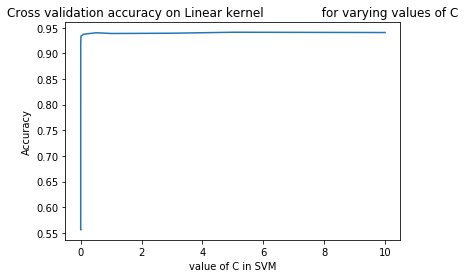

Value of C for which cross validation accuracy is maximum is:  5


In [292]:
#Plotting the accuracy against different values of C while cross validation
plotData(accuracyList)
print("Value of C for which cross validation accuracy is maximum is: ",max_c)

In [294]:
#Findings on the test set using the max C found from cross validation
computed_test_labels, original_test_labels, time_taken = \
   svmClassifier(train_set,test_set,max_c,'linear','auto')
accuracy_test = computeAccuracy(computed_test_labels, original_test_labels)
print("accuracy on test set for linear kernel is: ",accuracy_test)


accuracy on test set for linear kernel is:  0.9343283582089552


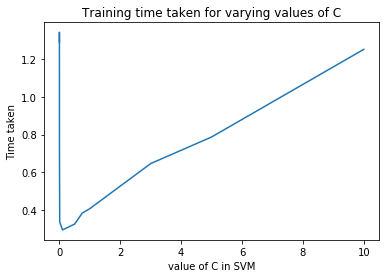

In [295]:
#Plotting the training time across different values of C
y = [temp[1] for temp in timeTakenList]
x = [temp[0] for temp in timeTakenList]
plt.plot(y,x)
plt.title('Training time taken for varying values of C')
plt.xlabel('value of C in SVM')
plt.ylabel('Time taken')
plt.show()

In [296]:
#Question 2(c)
#Experimenting with RBF and Polynomial kernels and various values of C
#RBF kernel with gamma=auto
max_c_rbf, accuracyList_rbf, timeTakenList_rbf = \
    crossValidation(train_set,'rbf','auto')

accuracy is:  0.5559174809989142
Average training time is:  1.9623085657755535
c value is:  1e-06
accuracy is:  0.5560532030401737
Average training time is:  1.9718196392059326
c value is:  1e-05
accuracy is:  0.5557817589576547
Average training time is:  1.9996659755706787
c value is:  0.0001
accuracy is:  0.5560532030401737
Average training time is:  2.0026689370473227
c value is:  0.001
accuracy is:  0.897801302931596
Average training time is:  1.85596497853597
c value is:  0.01
accuracy is:  0.9288816503800218
Average training time is:  0.8145426909128824
c value is:  0.1
accuracy is:  0.9448968512486428
Average training time is:  0.5196771621704102
c value is:  0.5
accuracy is:  0.9482899022801302
Average training time is:  0.48705561955769855
c value is:  0.75
accuracy is:  0.9476112920738328
Average training time is:  0.48689993222554523
c value is:  1
accuracy is:  0.9546688382193268
Average training time is:  0.43829162915547687
c value is:  3
accuracy is:  0.9543973941368078


Value of c for which RBF kernel gave maximum accuracy is:  10
Maximum value of accuracy is:  (0.9603691639522257, 10)


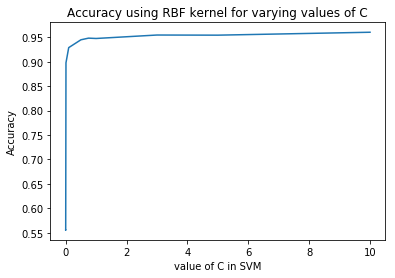

In [297]:
#RBF kernel for gamma='auto'
print("Value of c for which RBF kernel gave maximum accuracy is: ",max_c_rbf)
print("Maximum value of accuracy is: ",max(accuracyList_rbf))

#Plot of accuracies against C values for RBF kernel
y = [temp[1] for temp in accuracyList_rbf]
x = [temp[0] for temp in accuracyList_rbf]
plt.plot(y,x)
plt.title('Accuracy using RBF kernel for varying values of C')
plt.xlabel('value of C in SVM')
plt.ylabel('Accuracy')
plt.show()

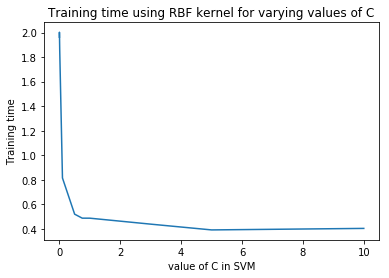

In [298]:
#Plot of accuracies against C values for RBF kernel
y = [temp[1] for temp in timeTakenList_rbf]
x = [temp[0] for temp in timeTakenList_rbf]
plt.plot(y,x)
plt.title('Training time using RBF kernel for varying values of C')
plt.xlabel('value of C in SVM')
plt.ylabel('Training time')
plt.show()

In [299]:
#Findings on the test set using the max C found from cross validation
computed_test_labels, original_test_labels, time_taken = \
   svmClassifier(train_set,test_set,max_c,'rbf','auto')
accuracy_test = computeAccuracy(computed_test_labels, original_test_labels)
print("accuracy on test set for rbf kernel is: ",accuracy_test)

accuracy on test set for rbf kernel is:  0.9560379918588874


In [300]:
#Cross validation on rbf kernel for gamma='scale'
max_c_rbf, accuracyList_rbf, timeTakenList_rbf = \
    crossValidation(train_set,'rbf','scale')

accuracy is:  0.5559174809989141
Average training time is:  2.0316899617513022
c value is:  1e-06
accuracy is:  0.5559174809989141
Average training time is:  2.061040719350179
c value is:  1e-05
accuracy is:  0.5559174809989141
Average training time is:  2.1574387550354004
c value is:  0.0001
accuracy is:  0.5559174809989142
Average training time is:  2.085390647252401
c value is:  0.001
accuracy is:  0.8964440825190011
Average training time is:  1.8598171869913738
c value is:  0.01
accuracy is:  0.9330890336590661
Average training time is:  0.8408935864766439
c value is:  0.1
accuracy is:  0.9450325732899024
Average training time is:  0.551368236541748
c value is:  0.5
accuracy is:  0.9491042345276873
Average training time is:  0.5440111955006918
c value is:  0.75
accuracy is:  0.9519543973941369
Average training time is:  0.499331792195638
c value is:  1
accuracy is:  0.9564332247557004
Average training time is:  0.4502998987833659
c value is:  3
accuracy is:  0.9569761129207383
Aver

Value of c for which RBF kernel gave maximum accuracy is:  10
Maximum value of accuracy is:  (0.9594191096634094, 10)


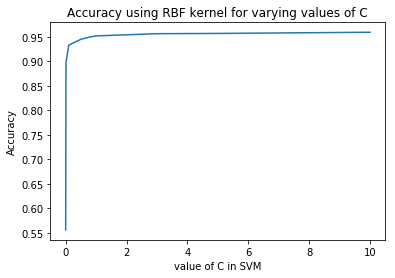

In [301]:
#RBF kernel for gamma='scale'
print("Value of c for which RBF kernel gave maximum accuracy is: ",max_c_rbf)
print("Maximum value of accuracy is: ",max(accuracyList_rbf))

#Plot of accuracies against C values for RBF kernel
y = [temp[1] for temp in accuracyList_rbf]
x = [temp[0] for temp in accuracyList_rbf]
plt.plot(y,x)
plt.title('Accuracy using RBF kernel for varying values of C')
plt.xlabel('value of C in SVM')
plt.ylabel('Accuracy')
plt.show()

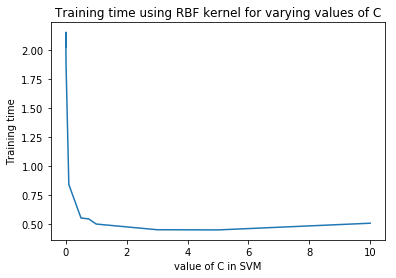

In [302]:
#Plot of time taken against C values for RBF kernel
y = [temp[1] for temp in timeTakenList_rbf]
x = [temp[0] for temp in timeTakenList_rbf]
plt.plot(y,x)
plt.title('Training time using RBF kernel for varying values of C')
plt.xlabel('value of C in SVM')
plt.ylabel('Training time')
plt.show()

In [303]:
#Findings on the test set using the max C found from cross validation
computed_test_labels, original_test_labels, time_taken = \
   svmClassifier(train_set,test_set,max_c,'rbf','scale')
accuracy_test = computeAccuracy(computed_test_labels, original_test_labels)
print("accuracy on test set for rbf kernel is: ",accuracy_test)

accuracy on test set for rbf kernel is:  0.9579375848032564


In [304]:
#For polynomial kernel with gamma='auto'
max_c_poly, accuracyList_poly, timeTakenList_poly = \
    crossValidation(train_set,'poly','auto')


accuracy is:  0.5559174809989142
Average training time is:  1.4449633757273357
c value is:  1e-06
accuracy is:  0.5557817589576547
Average training time is:  1.4342902501424153
c value is:  1e-05
accuracy is:  0.5559174809989142
Average training time is:  1.4893271923065186
c value is:  0.0001
accuracy is:  0.5557817589576547
Average training time is:  1.5459579626719158
c value is:  0.001
accuracy is:  0.5560532030401737
Average training time is:  1.478987455368042
c value is:  0.01
accuracy is:  0.9157166123778501
Average training time is:  0.9613080819447836
c value is:  0.1
accuracy is:  0.9401465798045603
Average training time is:  0.567042350769043
c value is:  0.5
accuracy is:  0.9435396308360477
Average training time is:  0.5016653537750244
c value is:  0.75
accuracy is:  0.9484256243213899
Average training time is:  0.4903263250986735
c value is:  1
accuracy is:  0.9533116178067319
Average training time is:  0.4252811272939046
c value is:  3
accuracy is:  0.9573832790445168
Av

Value of c for which poly kernel gave maximum accuracy is:  5
Maximum value of accuracy is:  (0.9573832790445168, 5)


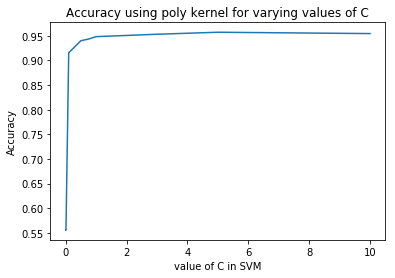

In [305]:
#polynomial kernel
print("Value of c for which poly kernel gave maximum accuracy is: ",max_c_poly)
print("Maximum value of accuracy is: ",max(accuracyList_poly))

#Plot of accuracies against C values for RBF kernel
y = [temp[1] for temp in accuracyList_poly]
x = [temp[0] for temp in accuracyList_poly]
plt.plot(y,x)
plt.title('Accuracy using poly kernel for varying values of C')
plt.xlabel('value of C in SVM')
plt.ylabel('Accuracy')
plt.show()

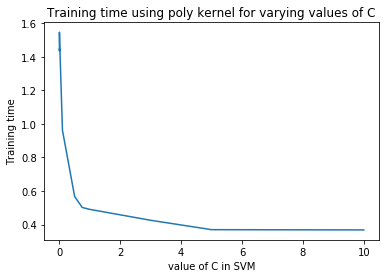

In [306]:
#Plot of accuracies against C values for RBF kernel
y = [temp[1] for temp in timeTakenList_poly]
x = [temp[0] for temp in timeTakenList_poly]
plt.plot(y,x)
plt.title('Training time using poly kernel for varying values of C')
plt.xlabel('value of C in SVM')
plt.ylabel('Training time')
plt.show()

In [310]:
#Findings on the test set using the max C found from cross validation
computed_test_labels, original_test_labels, time_taken = \
   svmClassifier(train_set,test_set,max_c,'poly','auto')
accuracy_test = computeAccuracy(computed_test_labels, original_test_labels)
print("accuracy on test set for poly kernel is: ",accuracy_test)

accuracy on test set for poly kernel is:  0.9563093622795116


In [311]:
#For polynomial kernel with gamma='scale'
max_c_poly, accuracyList_poly, timeTakenList_poly = \
    crossValidation(train_set,'poly','scale')

accuracy is:  0.5560532030401737
Average training time is:  1.4409615993499756
c value is:  1e-06
accuracy is:  0.5559174809989142
Average training time is:  1.4503031571706135
c value is:  1e-05
accuracy is:  0.5559174809989141
Average training time is:  1.7781872749328613
c value is:  0.0001
accuracy is:  0.5559174809989141
Average training time is:  1.5793872674306233
c value is:  0.001
accuracy is:  0.8113463626492942
Average training time is:  1.7555039723714192
c value is:  0.01
accuracy is:  0.9358034744842563
Average training time is:  0.7469995816548666
c value is:  0.1
accuracy is:  0.9501900108577633
Average training time is:  0.4476319948832194
c value is:  0.5
accuracy is:  0.9529044516829533
Average training time is:  0.43929290771484375
c value is:  0.75
accuracy is:  0.9548045602605862
Average training time is:  0.40193430582682294
c value is:  1
accuracy is:  0.9576547231270358
Average training time is:  0.36958058675130206
c value is:  3
accuracy is:  0.95901194353963

Value of c for which poly kernel gave maximum accuracy is:  10
Maximum value of accuracy is:  (0.9617263843648208, 10)


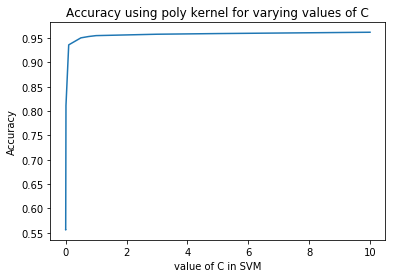

In [312]:
#polynomial kernel with gamma='scale'
print("Value of c for which poly kernel gave maximum accuracy is: ",max_c_poly)
print("Maximum value of accuracy is: ",max(accuracyList_poly))

#Plot of accuracies against C values for RBF kernel
y = [temp[1] for temp in accuracyList_poly]
x = [temp[0] for temp in accuracyList_poly]
plt.plot(y,x)
plt.title('Accuracy using poly kernel for varying values of C')
plt.xlabel('value of C in SVM')
plt.ylabel('Accuracy')
plt.show()

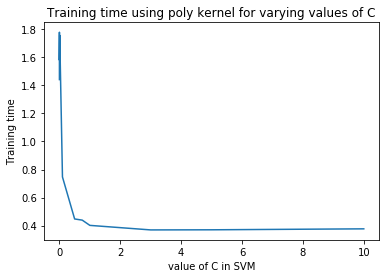

In [313]:
#Plot of time taken against C values for polynomial kernel
y = [temp[1] for temp in timeTakenList_poly]
x = [temp[0] for temp in timeTakenList_poly]
plt.plot(y,x)
plt.title('Training time using poly kernel for varying values of C')
plt.xlabel('value of C in SVM')
plt.ylabel('Training time')
plt.show()

In [314]:
#Findings on the test set using the max C found from cross validation
computed_test_labels, original_test_labels, time_taken = \
   svmClassifier(train_set,test_set,max_c,'poly','scale')
accuracy_test = computeAccuracy(computed_test_labels, original_test_labels)
print("accuracy on test set for rbf kernel is: ",accuracy_test)

accuracy on test set for rbf kernel is:  0.9595658073270014


In [ ]:
#Question 2(d) Bonus
#Implementing Linear SVM

In [107]:
import numpy as np
from numpy import linalg
import sys
sys.path.append(r'C:\Users\Admin\Anaconda3\Lib\site-packages')
import cvxopt
import cvxopt.solvers

In [320]:
class SVM(object):
    def __init__(self, C=None):
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        num_samples = X.shape[0]
        num_features = X.shape[1]
        print("Number of samples: ",num_samples)
        print("Number of features: ",num_features)
        
        #Converting from data frame to np array
        X= X.values
        y = y.values
        #Using the python equivalent of quadprog in Matlab
        #to solve the dual problem in SVM
        K = np.zeros((num_samples, num_samples))
        
        for i in range(num_samples):
            for j in range(num_samples):
                K[i,j] = np.dot(X[i],X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        #q should be vector of 1s
        q = cvxopt.matrix(np.ones(num_samples) * -1)
        y = y.astype('double')
        #A should be transpose of y
        A = cvxopt.matrix(y, (1,num_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(num_samples) * -1))
            h = cvxopt.matrix(np.zeros(num_samples))
        else:
            tmp1 = np.diag(np.ones(num_samples) * -1)
            tmp2 = np.identity(num_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(num_samples)
            tmp2 = np.ones(num_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve Quadprog problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers, solutions to dual problem
        alpha = np.ravel(solution['x'])
        print("alpha values:", alpha)

        # Support vectors have non zero lagrange multipliers
        support_vector = alpha > 1e-5
        ind = np.arange(len(alpha))[support_vector]
        self.alpha = alpha[support_vector]
        self.support_vector = X[support_vector]
        self.support_vector_y = y[support_vector]
        print("%d support vectors out of %d points" % (len(self.alpha),num_samples))

        #Solutions to primal problem can be found from alpha
        # Bias
        self.b = 0
        for n in range(len(self.alpha)):
            self.b += self.support_vector_y[n]
            self.b -= np.sum(self.alpha * self.support_vector_y * \
                             K[ind[n],support_vector])
        self.b /= len(self.alpha)

        # Weight vector
        self.w = np.zeros(num_features)
        for n in range(len(self.alpha)):
            self.w += self.alpha[n] * self.support_vector_y[n] * \
                        self.support_vector[n]

        return self.w, self.b 
            
    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, support_vector_y, support_vector in zip(self.alpha, \
                                self.support_vector_y, self.support_vector):
                    s += alpha * support_vector_y * np.dot(X[i], support_vector)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

In [317]:
#Linear SVM with C value 10
clf = SVM(C=10)
#Training function
weights, bias = clf.fit(X_train, Y_train)
print(weights)
print(bias)

print("weights vector shape is: ",weights.shape)
print("Bias is: ",bias)

Number of samples:  7370
Number of features:  46
     pcost       dcost       gap    pres   dres
 0: -9.6634e+03 -5.2273e+05  1e+06  8e-01  5e-12
 1: -8.0986e+03 -1.9335e+05  3e+05  1e-01  5e-12
 2: -7.0741e+03 -7.6195e+04  1e+05  4e-02  4e-12
 3: -6.9335e+03 -5.2049e+04  6e+04  2e-02  3e-12
 4: -6.9541e+03 -4.6145e+04  5e+04  2e-02  3e-12
 5: -6.9920e+03 -4.2621e+04  5e+04  1e-02  3e-12
 6: -7.2803e+03 -2.9021e+04  2e+04  5e-03  4e-12
 7: -7.9133e+03 -2.1258e+04  1e+04  3e-03  5e-12
 8: -8.4074e+03 -1.7627e+04  1e+04  2e-03  5e-12
 9: -8.6475e+03 -1.5934e+04  8e+03  1e-03  5e-12
10: -8.8275e+03 -1.4910e+04  6e+03  8e-04  6e-12
11: -9.0572e+03 -1.3825e+04  5e+03  6e-04  6e-12
12: -9.2256e+03 -1.3104e+04  4e+03  4e-04  6e-12
13: -9.4567e+03 -1.2293e+04  3e+03  2e-04  6e-12
14: -9.5957e+03 -1.1769e+04  2e+03  1e-04  6e-12
15: -9.7002e+03 -1.1461e+04  2e+03  9e-05  6e-12
16: -9.7933e+03 -1.1132e+04  1e+03  4e-05  6e-12
17: -9.8878e+03 -1.0867e+04  1e+03  2e-05  6e-12
18: -9.9287e+03 -1.07

In [319]:
print("Weights vector is :",weights)

Weights vector is : [ 0.49394462 -0.34206456  0.28478232 -0.13526427  1.8440422  -0.1306581
  0.11434759  0.09819524 -0.2921716   0.12595693 -0.11638286 -0.16824847
 -0.75476727  0.08732429  0.09759035 -0.28421843 -0.22192529 -0.01770542
  0.54080104  0.02568404  0.37584556  0.20754678 -0.12956627  0.02726207
  0.10199276 -0.34509785 -0.19080894  0.53559535 -0.21783326 -1.64318622
  1.86070804 -2.12091866  0.58012482  1.54048239 -0.58259332  0.33543577
  0.24684611 -0.53043417  0.34094622  0.18917651  0.10904708 -0.59654854
  0.48719002 -0.39170719 -0.34055016  0.73194591]


In [318]:
y_predict = clf.predict(X_test)
correct = np.sum(y_predict == Y_test)
print("Accuracy on test set is:", correct/len(y_predict))

Accuracy on test set is: 0.9354138398914519
